## 1-import Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


## 2-load data

In [45]:
train= pd.read_csv("train.csv")
test= pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3-Understand the data

In [46]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [48]:
print(train.isna().sum().to_string())


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [49]:
skewness = skew(train['SalePrice'])
print(f"Skewness of SalePrice: {skewness:.2f}")
##right_skewd

Skewness of SalePrice: 1.88


## Step 4: Handle Missing Values

In [50]:
# Fill missing categorical values with "None" only if missing means "No Feature"

for col in ["PoolQC", "Alley", "FireplaceQu", "Fence", "MiscFeature",'GarageFinish','GarageCond','GarageQual','GarageType',"MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]:
    train[col]=train[col].fillna("None")
    test[col]=test[col].fillna("None")

# Fill other categorical missing values with the most common value (mode)
cat_feature=[col for col in train.columns if train[col].dtype == "object" and test[col].isna().sum()>0]

for col in cat_feature:
    mode_value=train[col].mode()
    train[col]=train[col].fillna(mode_value)
    test[col]=test[col].fillna(mode_value)
    train[col]=train[col] = train[col].astype(str).str.strip().str.title()  
    train[col]=train[col].replace("Nan", "None")
    


train['Electrical']=train['Electrical'].fillna('SBrkr')
test['Electrical']=test['Electrical'].fillna('SBrkr')


In [51]:
# Fill numerical missing values with 0 (Garage-related)
for col in['GarageYrBlt','GarageArea']:
    train[col]=train[col].fillna(0)
    test[col]=test[col].fillna(0)

num_with_nul = [col for col in train.columns if train[col].dtype in ['int64', 'float64'] and train[col].isna().sum() > 0] 
for col in num_with_nul:
    median_value=train[col].median()
    train[col]=train[col].fillna(median_value)
    test[col]=test[col].fillna(median_value)

In [52]:
print(train.isnull().sum().sum()) 


0


## Step 5: Remove Outliers


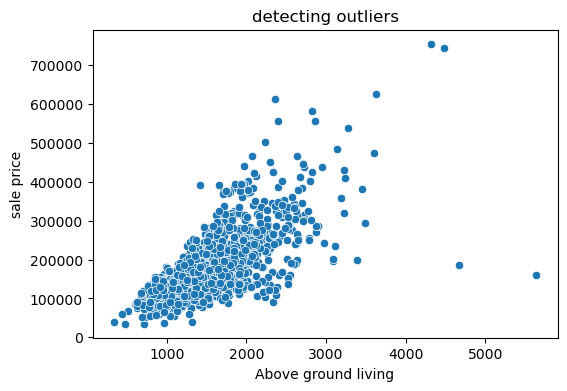

In [53]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel("Above ground living")
plt.ylabel("sale price")
plt.title("detecting outliers")
plt.show()

In [54]:
train = train[train['GrLivArea'] < 4000]


Text(0.5, 1.0, 'Before Log Transformation')

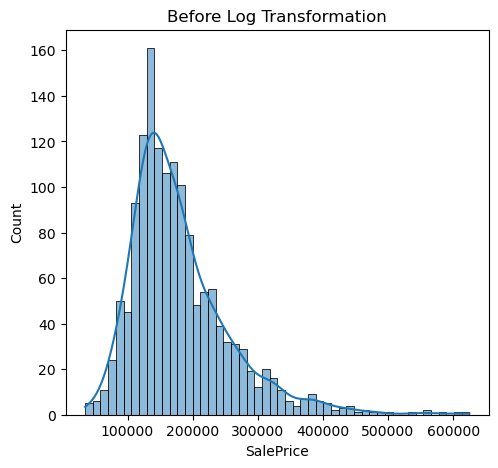

In [55]:
# Plot SalePrice before log transformation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(train["SalePrice"], bins=50, kde=True)
plt.title("Before Log Transformation")


## Step 6: Transform the Target Variable (SalePrice)


In [56]:
train['SalePrice']=np.log1p(train['SalePrice'])      


Text(0.5, 1.0, 'Before Log Transformation')

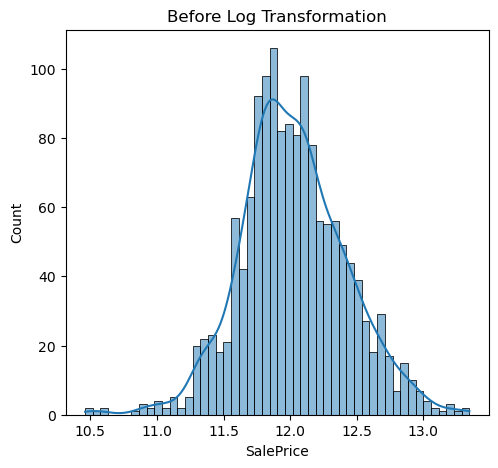

In [57]:
# Plot SalePrice after log transformation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(train["SalePrice"], bins=50, kde=True)
plt.title("Before Log Transformation")


## Step 7: Encode Categorical Features


In [58]:
train_copy = train.copy()
test_copy = test.copy()


In [59]:
print(train_copy.isnull().sum().sum())  


0


In [60]:
# choose categorical variable
cat_feature=train_copy.select_dtypes(include=['object']).columns
print(cat_feature)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [61]:
train_copy['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object)

In [62]:
ordinal_col = train_copy[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual', 'HeatingQC']]
nominal_col=[col for col in cat_feature if col not in ordinal_col]

#use label encoder
ordinal_mapping={ 'Ex': 5,'Gd':4,'TA':3,  'Fa':2, 'Po':1, 'None':0}

for col in ordinal_col:
    if col in train_copy.columns:
        train_copy[col]=train_copy[col].map(ordinal_mapping)
        test_copy[col]=test_copy[col].map(ordinal_mapping)

#use get_dummies 

low_cardinality_cols = [col for col in nominal_col if train_copy[col].nunique() <= 5]
train_copy = pd.get_dummies(train_copy, columns=low_cardinality_cols, drop_first=True)
test_copy = pd.get_dummies(test_copy, columns=low_cardinality_cols, drop_first=True)

print(f"تم تحويل الأعمدة غير المرتبة إلى One-Hot: {low_cardinality_cols}")
print(f"تم تحويل الأعمدة المرتبة إلى Ordinal Encoding: {ordinal_col}")

تم تحويل الأعمدة غير المرتبة إلى One-Hot: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'BsmtExposure', 'CentralAir', 'Electrical', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature']
تم تحويل الأعمدة المرتبة إلى Ordinal Encoding:      ExterQual ExterCond BsmtQual BsmtCond KitchenQual HeatingQC
0           Gd        TA       Gd       TA          Gd        Ex
1           TA        TA       Gd       TA          Ta        Ex
2           Gd        TA       Gd       TA          Gd        Ex
3           TA        TA       TA       Gd          Gd        Gd
4           Gd        TA       Gd       TA          Gd        Ex
...        ...       ...      ...      ...         ...       ...
1455        TA        TA       Gd       TA          Ta        Ex
1456        TA        TA       Gd       TA          Ta        TA
1457        Ex        Gd       TA       Gd          Gd        Ex
1458        TA        TA     

In [63]:
train_copy['KitchenQual']=train_copy['KitchenQual'].fillna(0)  # استبدال NaN بالقيمة 0


In [64]:
missing_values = train_copy.isnull().sum()
print(missing_values[missing_values > 0])  # عرض الأعمدة التي تحتوي على NaN


Series([], dtype: int64)


In [65]:
print(train_copy.shape)  # (number_of_rows, number_of_columns)
print(test_copy.shape)   # (number_of_rows, number_of_columns)


(1456, 115)
(1459, 110)


In [66]:
# Save the target column before modifying train_copy
target = train_copy['SalePrice']

# Remove the target column from train before aligning columns
train_copy = train_copy.drop(columns=['SalePrice'])

# Get the union of all feature columns (excluding the target)
all_cols = train_copy.columns.union(test_copy.columns)

# Align both datasets by reindexing
train_copy = train_copy.reindex(columns=all_cols, fill_value=0)  
test_copy = test_copy.reindex(columns=all_cols, fill_value=0)

# Add the target column back to train
train_copy['SalePrice'] = target

print(train_copy.shape)  
print(test_copy.shape)  

(1456, 119)
(1459, 118)


## Step 8: Feature Scaling


In [67]:
train_scaled = train_copy.copy()
test_scaled = test_copy.copy()

In [ ]:
num_features = train_scaled.select_dtypes(include=['int64','float64']).columns
num_features = num_features.drop('SalePrice')

scaler = StandardScaler()

train_scaled[num_features] = scaler.fit_transform(train_scaled[num_features])
test_scaled[num_features] = scaler.transform(test_scaled[num_features])

train_copy['LotArea'] = np.log1p(train_copy['LotArea'])  # Log transformation

train_scaled['LotArea'] = scaler.fit_transform(train_copy[['LotArea']])

print(train_scaled.shape) 
print(t 04prest_scaled.shape) 

(1456, 119)
(1459, 118)


In [ ]:
# إحصائيات الأعمدة العددية قبل التحجيم
print("🔹 قبل التحجيم:")
print(train_copy[num_features].describe())

# إحصائيات الأعمدة العددية بعد التحجيم
print("\n🔹 بعد التحجيم:")
print(train_scaled[num_features].describe())


🔹 قبل التحجيم:
          1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr     BsmtCond  \
count  1456.000000  1456.000000  1456.000000   1456.000000  1456.000000   
mean   1157.108516   343.532967     3.418956      2.864698     2.934753   
std     369.307331   431.528915    29.357056      0.815800     0.552906   
min     334.000000     0.000000     0.000000      0.000000     0.000000   
25%     882.000000     0.000000     0.000000      2.000000     3.000000   
50%    1086.000000     0.000000     0.000000      3.000000     3.000000   
75%    1389.250000   728.000000     0.000000      3.000000     3.000000   
max    3228.000000  1818.000000   508.000000      8.000000     4.000000   

        BsmtFinSF1   BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtQual  ...  \
count  1456.000000  1456.000000   1456.000000   1456.000000  1456.00000  ...   
mean    436.991071    46.677198      0.423764      0.057005     3.48489  ...   
std     430.255052   161.522376      0.517420      0.237786     0.874

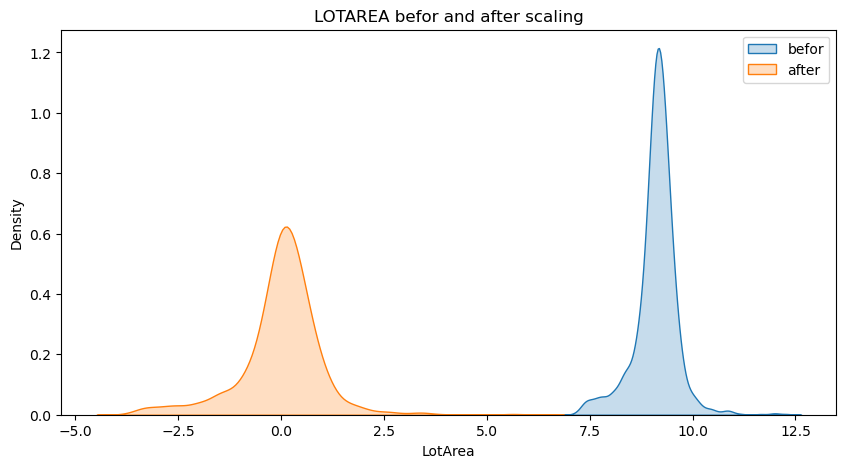

In [70]:
plt.figure(figsize=(10, 5))
sns.kdeplot(train_copy['LotArea'], label='befor', fill=True)
sns.kdeplot(train_scaled['LotArea'], label='after', fill=True)
plt.legend()
plt.title('LOTAREA befor and after scaling')
plt.show()


In [71]:
print(train_copy['LotArea'].describe())
print(train_scaled['LotArea'].describe())


count    1456.000000
mean        9.107632
std         0.513351
min         7.170888
25%         8.927944
50%         9.155831
75%         9.357811
max        12.279537
Name: LotArea, dtype: float64
count    1.456000e+03
mean    -6.649138e-16
std      1.000344e+00
min     -3.774046e+00
25%     -3.501503e-01
50%      9.392281e-02
75%      4.875125e-01
max      6.180947e+00
Name: LotArea, dtype: float64


In [72]:
train_scaled.to_csv("cleaned_train.csv", index=False)
test_scaled.to_csv("cleaned_test.csv", index=False)
